 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
path_filenm_whale = Path('Starter_Code/Resources/whale_returns.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object
whale_returns_df = pd.read_csv(path_filenm_whale, index_col = 'Date', infer_datetime_format=True, parse_dates=True)
# Inspect raw dataframe
print(whale_returns_df.info())
#print(whale_returns_df.dtypes)
print(whale_returns_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
None
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 .

In [4]:
# Count nulls
#print(whale_returns_df.isnull())
whale_returns_null_counts = whale_returns_df.isnull().sum()
print(f"whale_returns.csv null counts:\n{whale_returns_null_counts}")
#print(whale_returns_df.isnull().value_counts())

whale_returns.csv null counts:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [5]:
# Drop nulls (testing alternative order of copy() method on original dataframe)
#whale_returns_clean_df2 = whale_returns_df.copy().dropna()
#print(whale_returns_clean_df)
#whale_returns_clean_null_counts = whale_returns_clean_df.isnull().sum()
#print(f"whale_returns_clean_df null counts:\n{whale_returns_clean_null_counts}")
#whale_returns_clean_df2

In [6]:
# Drop nulls
whale_returns_clean_df = whale_returns_df.dropna().copy()
print(whale_returns_clean_df)
print(whale_returns_clean_df.info(),'\n')
whale_returns_clean_null_counts = whale_returns_clean_df.isnull().sum()
print(f"whale_returns_clean_df null counts:\n{whale_returns_clean_null_counts}")

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
path_filenm_algo = Path('Starter_Code/Resources/algo_returns.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object
algo_returns_df = pd.read_csv(path_filenm_algo, index_col='Date', infer_datetime_format=True, parse_dates=True)
# Inspect raw dataframe
print(algo_returns_df.info())
#print(aglo_returns_df.dtypes)
print(algo_returns_df.head(20))
print(algo_returns_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
None
              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
2014-06-04 -0.001838       NaN
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
2014-06-12 -0.000028 -0.003841
2014-06-13  0.001917 -0.000814
2014-06-16  0.001084  0.001831
2014-06-17  0.000922  0.006870
2014-06-18 -0.006303  0.007228
2014-06-19 -0.000853  0.003989
2014-06-20  0.006398  0.003928
2014-06-23 -0.004532 -0.000615
2014-06-24  0.011861 -0.009389


In [8]:
# Count nulls
print(algo_returns_df.isnull())
algo_returns_null_counts = algo_returns_df.isnull().sum()
print(f"algo_returns.csv null counts:\n{algo_returns_null_counts}")
#print(algo_returns_df.isnull().value_counts())

            Algo 1  Algo 2
Date                      
2014-05-28   False    True
2014-05-29   False    True
2014-05-30   False    True
2014-06-02   False    True
2014-06-03   False    True
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1241 rows x 2 columns]
algo_returns.csv null counts:
Algo 1    0
Algo 2    6
dtype: int64


In [9]:
# Drop nulls
algo_returns_clean_df = algo_returns_df.dropna().copy()
print(algo_returns_clean_df)
print(algo_returns_clean_df.info(),'\n')
algo_returns_clean_null_counts = algo_returns_clean_df.isnull().sum()
print(f"algo_returns_clean_df null counts:\n{algo_returns_clean_null_counts}")

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB
None 

algo_returns_clean_df null counts:
Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
path_filenm_sp500 = Path('Starter_Code/Resources/sp500_history.csv')
# Create pandas dataframe from csv data file, set index to 'Date' column and convert to DateTime object, and sort index ascending
sp500_price_close_df = pd.read_csv(path_filenm_sp500, index_col = 'Date', infer_datetime_format=True, parse_dates=True).sort_index(ascending = True)
# Inspect raw dataframe
print(sp500_price_close_df.info())
print(sp500_price_close_df.dtypes)
print(sp500_price_close_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None
Close    object
dtype: object
               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [11]:
# Check Data Types
print(sp500_price_close_df.info())
print(sp500_price_close_df.dtypes)
print(sp500_price_close_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None
Close    object
dtype: object
               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]


In [12]:
# Fix Data Types
# Remove $ formatting from 'Close' prices columnn
# Convert 'Close' prices from string to float
sp500_price_close_clean_df = sp500_price_close_df.copy()
#print(sp500_price_close_df.Close.str.replace('$', '').astype(float))
sp500_price_close_clean_df.Close = sp500_price_close_clean_df.Close.str.replace('$', '').astype(float)
print(sp500_price_close_clean_df.info())
print(sp500_price_close_clean_df)
# Inspect data types after 'Close' prices formatting and data type conversion
#print(sp500_price_close_clean_df.info())
#print(sp500_price_close_clean_df.dtypes)
#print(sp500_price_close_clean_df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
...             ...
2019-04-16  2907.06
2019-04-17  2900.45
2019-04-18  2905.03
2019-04-22  2907.97
2019-04-23  2933.68

[1649 rows x 1 columns]


/var/folders/vs/xqw7pdh1517fh7rzhwn16hhm0000gn/T/ipykernel_14088/1058137283.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_price_close_clean_df.Close = sp500_price_close_clean_df.Close.str.replace('$', '').astype(float)


In [13]:
# Calculate Daily Returns
sp500_returns_df = sp500_price_close_clean_df.pct_change()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [14]:
# Drop nulls
sp500_returns_clean_df = sp500_returns_df.dropna().copy()
print(sp500_returns_clean_df.info())
sp500_returns_clean_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB
None


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns_clean_df = sp500_returns_clean_df.rename(columns={'Close': 'SP500'})
sp500_returns_clean_df

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Read in dataframes as a list to concatenate vertically
# axis=1 equivalent to axis='columns'; axis=0 equivalent to axis='rows'
returns_df = pd.concat([whale_returns_clean_df, algo_returns_clean_df,sp500_returns_clean_df], join='inner', axis='columns')
returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Portfolios Daily Returns'}, xlabel='Date'>

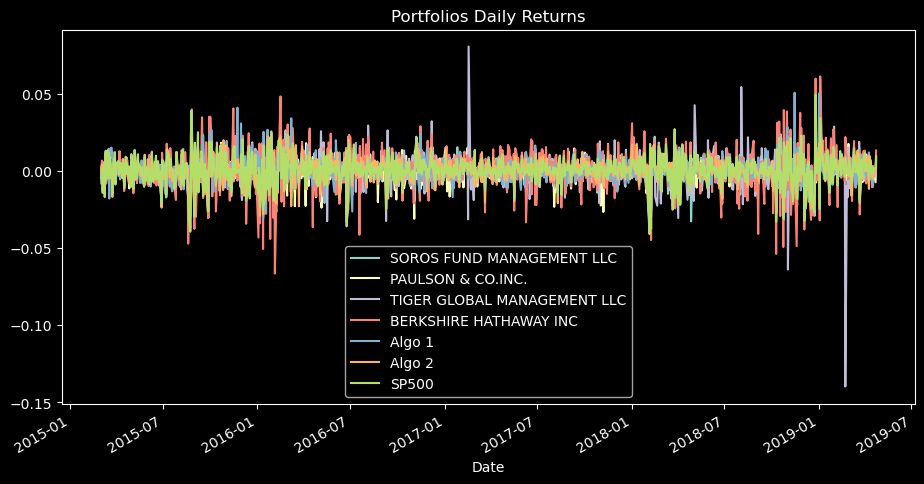

In [17]:
# Plot daily returns of all portfolios
# Plot default type: kind='line'
returns_df.plot(title='Portfolios Daily Returns', kind='line', figsize=(11,5.5))

#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   
...                               ...                 ...   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504             

<Axes: title={'center': 'Portfolios Cumulative Returns'}, xlabel='Date'>

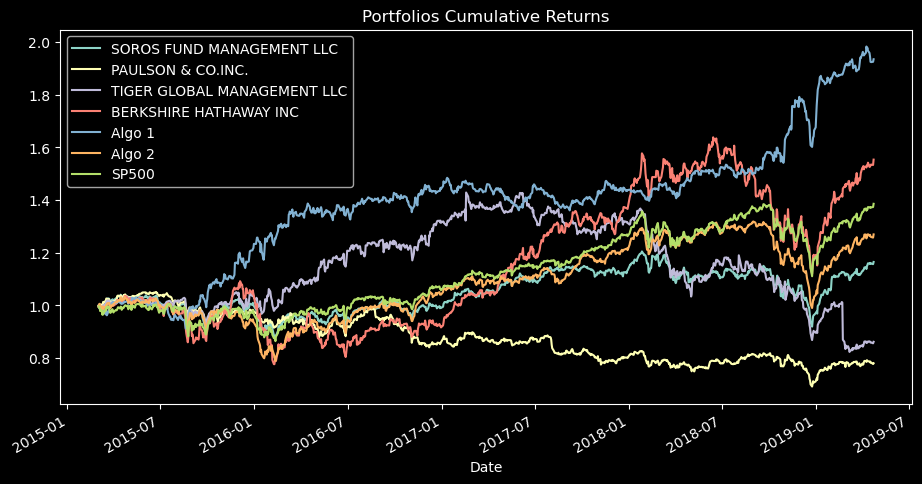

In [18]:
# Calculate cumulative returns of all portfolios
returns_cumul_df = (1+returns_df).cumprod()
print(returns_cumul_df)
# Plot cumulative returns
returns_cumul_df.plot(title='Portfolios Cumulative Returns', figsize=(11,5.5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Portfolios Returns Box Plots Illustrating Variability in Daily Returns'}>

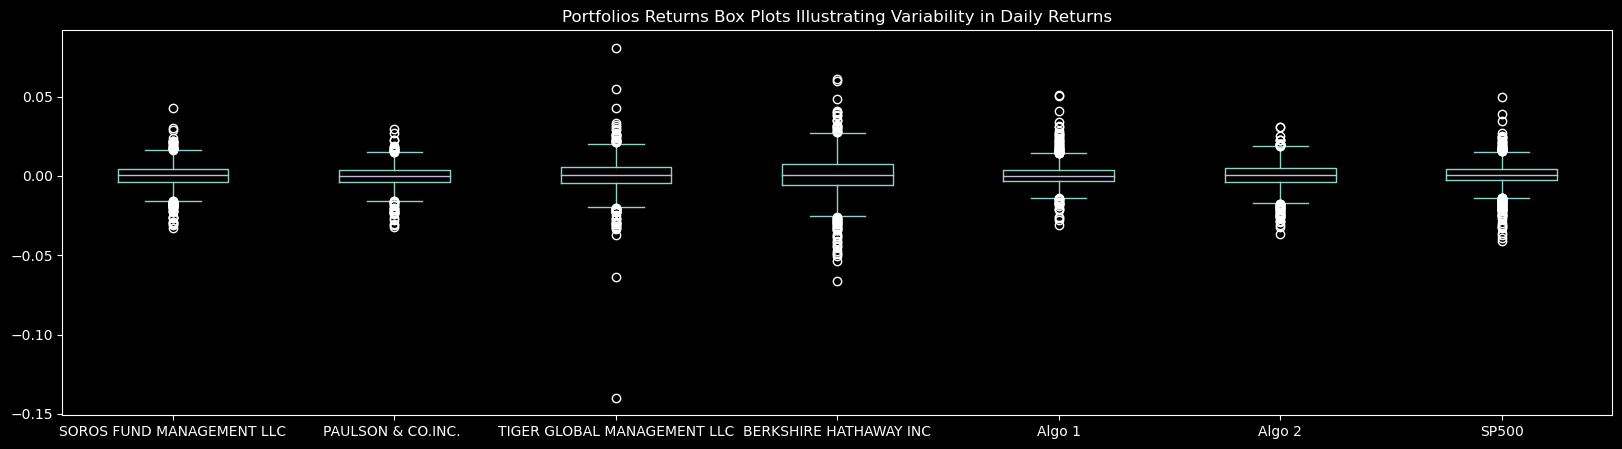

In [19]:
# Box plot to visually show risk
# Box plot of daily returns for each portfolio to illustrate variability, or risk, of returns
returns_df.plot.box(title='Portfolios Returns Box Plots Illustrating Variability in Daily Returns',figsize=(20,5))


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
returns_daily_standard_deviation_df = returns_df.std()
returns_daily_standard_deviation_df

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_standard_deviation = returns_df.SP500.std()
sp500_daily_standard_deviation
# Determine which portfolios are riskier than the S&P 500
for each in returns_df:
    #print(each)
    if each != 'SP500':
        #print(each)
        if returns_df[each].std() > sp500_daily_standard_deviation:
            #print('works')
            print(f"{each}'s portfolio was riskier than the S&P 500, as measured by a daily standard deviation of {returns_df[each].std():.4f} vs. the S&P500's of {sp500_daily_standard_deviation:.4f}, over the time period examined. \n")

TIGER GLOBAL MANAGEMENT LLC's portfolio was riskier than the S&P 500, as measured by a daily standard deviation of 0.0109 vs. the S&P500's of 0.0086, over the time period examined. 

BERKSHIRE HATHAWAY INC's portfolio was riskier than the S&P 500, as measured by a daily standard deviation of 0.0129 vs. the S&P500's of 0.0086, over the time period examined. 



### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
# Standard deviation is not additive, whereas Variance is additive.  Formula used: Daily_Variance (or Daily Standard Deviation squared) times 252 trading days, equals Annualized Variance.
# Square root of Annualized Variance yields Annualized Standard Deviation.  Numpy sqrt function not necessary.
returns_annualized_standard_deviation_df = (((returns_daily_standard_deviation_df)**2)*252)**(1/2) # annualized_standard_deviation = annualized_variance^(1/2) = ((daily_standard_deviation^2)*252)^(1/2)
returns_annualized_standard_deviation_df

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Portfolios Rolling 21-Day Daily Standard Deviation'}, xlabel='Date'>

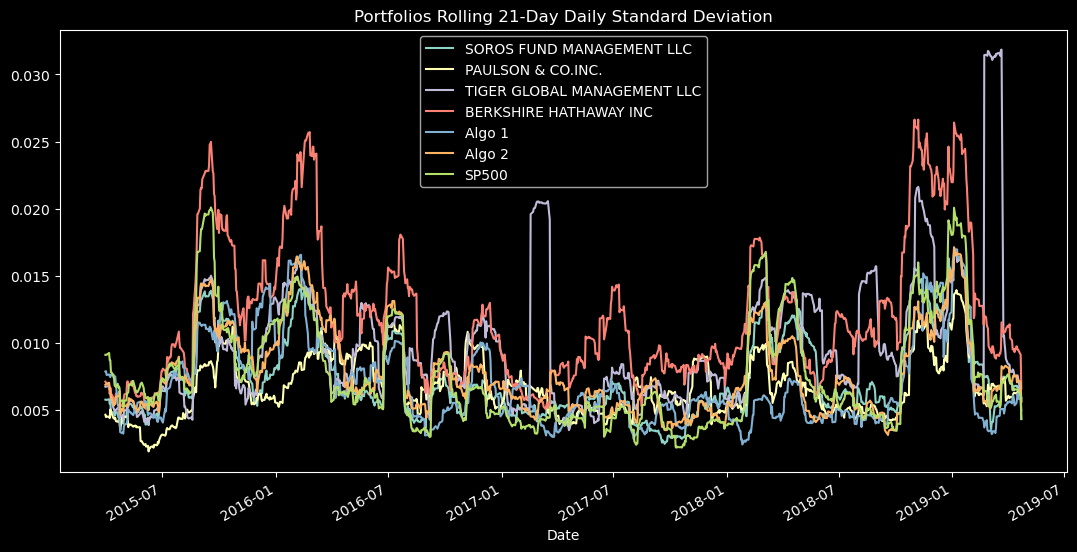

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#rolling_21_day_standard_deviation_dftest = returns_df.rolling(window=21).std()
#rolling_21_day_standard_deviation_dftest.head(30)
rolling_21_day_standard_deviation_df = returns_df.rolling(window=21).std().dropna().copy()
#print(rolling_21_day_standard_deviation_df)
# Plot the rolling standard deviation
rolling_21_day_standard_deviation_df.plot(title='Portfolios Rolling 21-Day Daily Standard Deviation', figsize=(13,6.5))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


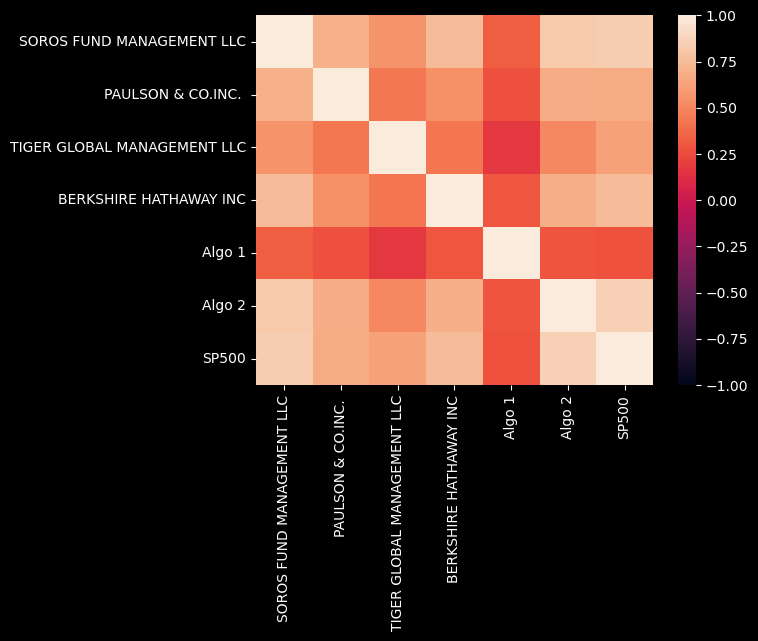

In [24]:
# Calculate the correlation
returns_correlation_df = returns_df.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(returns_correlation_df, vmin=-1, vmax=1)
returns_correlation_df

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

SOROS FUND MANAGEMENT LLC covariance with S&P 500 was: 5.658503197203612e-05
PAULSON & CO.INC.  covariance with S&P 500 was: 4.023315093652716e-05
TIGER GLOBAL MANAGEMENT LLC covariance with S&P 500 was: 5.8141830323050785e-05
BERKSHIRE HATHAWAY INC covariance with S&P 500 was: 8.302834941861666e-05
Algo 1 covariance with S&P 500 was: 1.8217749991632744e-05
Algo 2 covariance with S&P 500 was: 6.12793237414499e-05
SP500 covariance with S&P 500 was: 7.316632424648712e-05

The variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = 7.316632424648712e-05
True 

Whale Portfolios Betas Dataframe:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
0,0.773375,0.549886,0.794653,1.134789,0.248991,0.837535,1.0


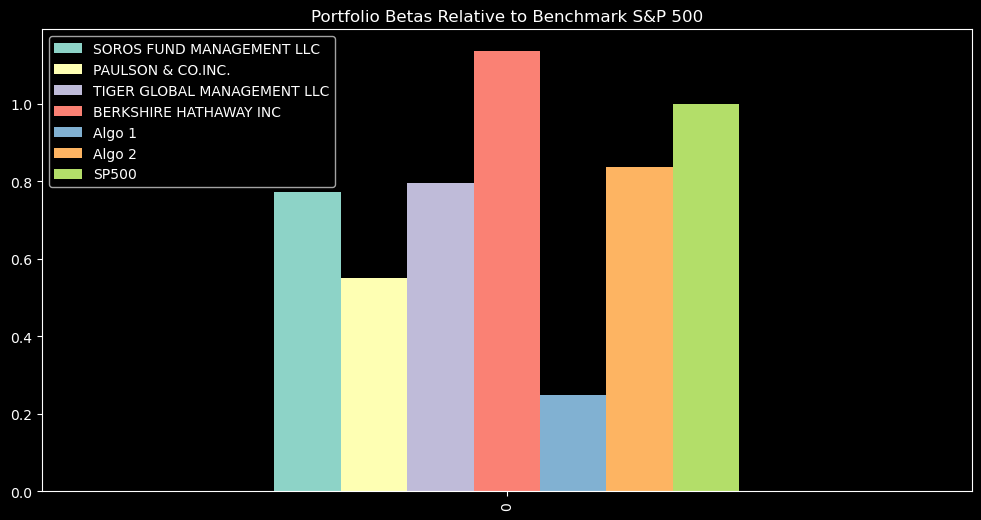

In [67]:
# Calculate covariance of a single portfolio
cov={} 
for each in returns_df:
    cov[each] = returns_df[each].cov(returns_df['SP500'])
    print(f"{each} covariance with S&P 500 was: {cov[each]}")    
    # Could prettify by putting covariance dictionary into dataframe
#print(cov)

# Calculate variance of S&P 500
print(f"\nThe variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = {cov['SP500']}")
# Confirm S&P 500 variance via the traditional calculation is equivalent to calculation above of S&P 500 covariance with itself
sp500_var = cov['SP500']
print(returns_df.SP500.var()==cov['SP500'],"\n") # Returns 'True', perfect.

# Computing beta
# Beta = cov(x,m)/v(m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
beta={}
for each in cov:
    beta[each] = cov[each]/sp500_var
#print(beta)

# Plot beta
# Prettify by putting beta dictionary into dataframe
beta_df = pd.DataFrame([beta]) # Explicity wrapped the dictionary in a list, 1 of 3 methods to otherwise circumvent conversion to dataframe error raised 'ValueError: If using all scalar values, you must pass an index' (see https://www.statology.org/valueerror-if-using-all-scalar-values-you-must-pass-an-index/)
#print(beta_df)
beta_df.plot(kind='bar', figsize=(12,6), title='Portfolio Betas Relative to Benchmark S&P 500')
print('Whale Portfolios Betas Dataframe:')
beta_df
# Plot beta trend (see next Notebook cell below)


The rolling 21-day variance of the S&P 500 is the same as the rolling 21-day covariance of the S&P 500 with itself.  S&P 500 rolling 21-day variance, or covariance with itself is:
Date
2015-03-31    0.000083
2015-04-01    0.000083
2015-04-02    0.000083
2015-04-06    0.000085
2015-04-07    0.000076
                ...   
2019-04-16    0.000042
2019-04-17    0.000043
2019-04-18    0.000042
2019-04-22    0.000037
2019-04-23    0.000019
Name: SP500, Length: 1023, dtype: float64


<Axes: title={'center': 'Portfolio Rolling 21-Day Betas Relative to Benchmark S&P 500'}, xlabel='Date'>

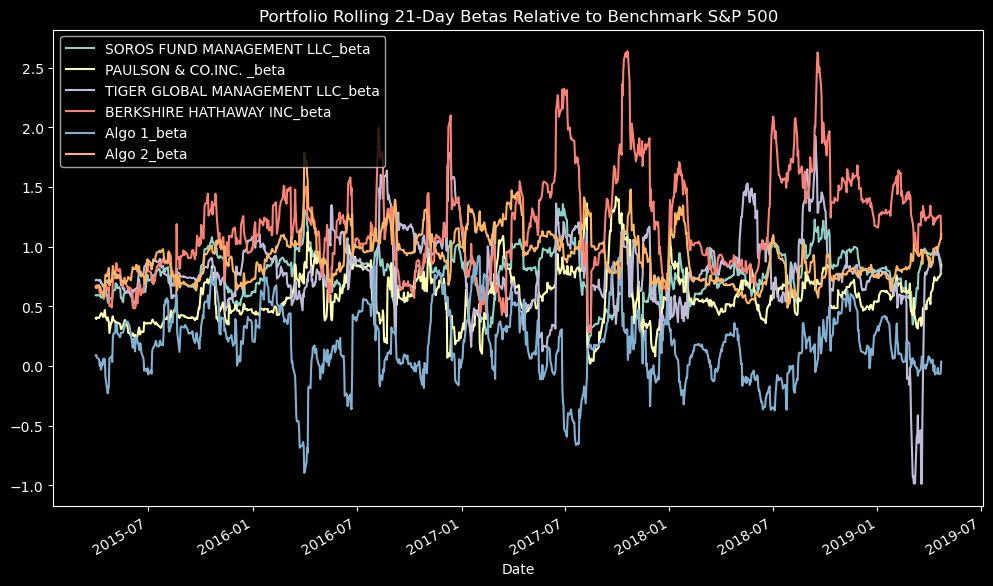

In [69]:
# Plot beta trend
rolling_21_day_cov={} # Using nifty dictionary
for each in returns_df:
    rolling_21_day_cov[each] = returns_df[each].rolling(window=21).cov(returns_df['SP500'])
    #print(f"{each} rolling 21-day covariance with S&P 500 was: {rolling_21_day_cov[each]}") # Nifty dictionary key-value lookup. 
    # Could prettify by putting covariance dictionary into dataframe
#print(rolling_21_day_cov)
# Clean up the calculated rolling covariance series by dropping the leading n/a's and converting to dataframe object
rolling_21_day_cov_clean_df = pd.DataFrame(rolling_21_day_cov).dropna().copy() # Since not passing all scalar values, did not have to pass an index by forcing one through wrapping dictionary in list within pd.DataFrame function.
#print(rolling_21_day_cov_clean_df)

#print(rolling_21_day_cov_clean_df['SP500'])

# Calculate variance of S&P 500.  v(m) = cov(m,m)
print(f"\nThe rolling 21-day variance of the S&P 500 is the same as the rolling 21-day covariance of the S&P 500 with itself.  S&P 500 rolling 21-day variance, or covariance with itself is:\n{rolling_21_day_cov_clean_df['SP500']}")

# Computing beta # Lesson here versus previous Notebook cell above is to get dictionary into dataframe as soon as possible, obviates need for messing with another dictionary in the beta routine below.
# Beta = cov(x,m)/v(m), and v(m) = cov(m,m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
for each in rolling_21_day_cov_clean_df:
     rolling_21_day_cov_clean_df[f"{each}_beta"] = rolling_21_day_cov_clean_df[each]/rolling_21_day_cov_clean_df['SP500'] # Discovered that this line and the one below produce the same output, to my surprise, because the ASSIGNMENT to the new dataframe column 'beta' IGNORES/SKIPS 'N/As'
     #print(rolling_21_day_cov_clean_df[f"{each}_beta"])
     #rolling_21_day_cov_clean_df[f"{each}_beta2"]=(rolling_21_day_cov[each]/rolling_21_day_cov['SP500']) # Original line without the 'clean_df' dataframe reference on the righthand side, thought was in error, but produced same result as preceding line of code
     #print(rolling_21_day_cov_clean_df[f"{each}_beta"])
     #test1=rolling_21_day_cov_clean_df[f"{each}_beta"]
     #print(rolling_21_day_cov[each]/rolling_21_day_cov['SP500'])
     #print(test1)
     #rolling_21_day_cov_clean_df[f"{each}_beta"]=(rolling_21_day_cov_clean_df[each]/rolling_21_day_cov_clean_df['SP500'])
     #test2=rolling_21_day_cov_clean_df[f"{each}_beta"]
     #print(rolling_21_day_cov_clean_df[each]/rolling_21_day_cov_clean_df['SP500'])
     #print(test2)

#print(rolling_21_day_cov_clean_df)

# Plot beta
# Columns to plot
# print(rolling_21_day_cov_clean_df.columns)
rolling_21_day_cov_clean_df[['SOROS FUND MANAGEMENT LLC_beta',
       'PAULSON & CO.INC. _beta', 'TIGER GLOBAL MANAGEMENT LLC_beta',
       'BERKSHIRE HATHAWAY INC_beta', 'Algo 1_beta', 'Algo 2_beta']].plot(kind='line', figsize=(12,7), title='Portfolio Rolling 21-Day Betas Relative to Benchmark S&P 500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
# Would calculate exponential moving average using pandas 'ewm' function.
# Code example: 
    # `returns_df['SOROS FUND MANAGEMENT LLC'].ewm()`
    # Can specify half-life, etc., as arguments to 'ewm' function.

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
# Sharpe Ratio = (Annualized Portfolio Return - Annualized Risk-Free Rate of Return) / Annualized Portfolio Standard Deviation - Annualized Risk-Free Standard Deviation
# We will assume the risk-free (typically 10-yr Treasury bond) rate of return and risk are zero.  Therefore, simplified Sharpe Ratio = Annualized Portfolio Return / Annualized Portfolio Standard Deviation
returns_sharpe_ratio = returns_df.mean()*252 / ((((returns_df.std())**2)*252)**(1/2)) # annualized_variance^(1/2) = ((daily_standard_deviation^2)*252)^(1/2) = annualized_standard_deviation
returns_sharpe_ratio
print(returns_sharpe_ratio)
print("\nPaulson & Co. and Tiger Global Management porfolios actually lost money in the period, as evidenced by negative Sharpe Ratios!")

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

Paulson & Co. and Tiger Global Management porfolios actually lost money in the period, as evidenced by negative Sharpe Ratios!


                             Sharpe Ratio
SOROS FUND MANAGEMENT LLC        0.356417
PAULSON & CO.INC.               -0.483570
TIGER GLOBAL MANAGEMENT LLC     -0.121060
BERKSHIRE HATHAWAY INC           0.621810
Algo 1                           1.378648
Algo 2                           0.501364
SP500                            0.648267


<Axes: title={'center': 'Portfolios Sharpe Ratios: March 2015 - April 2019'}>

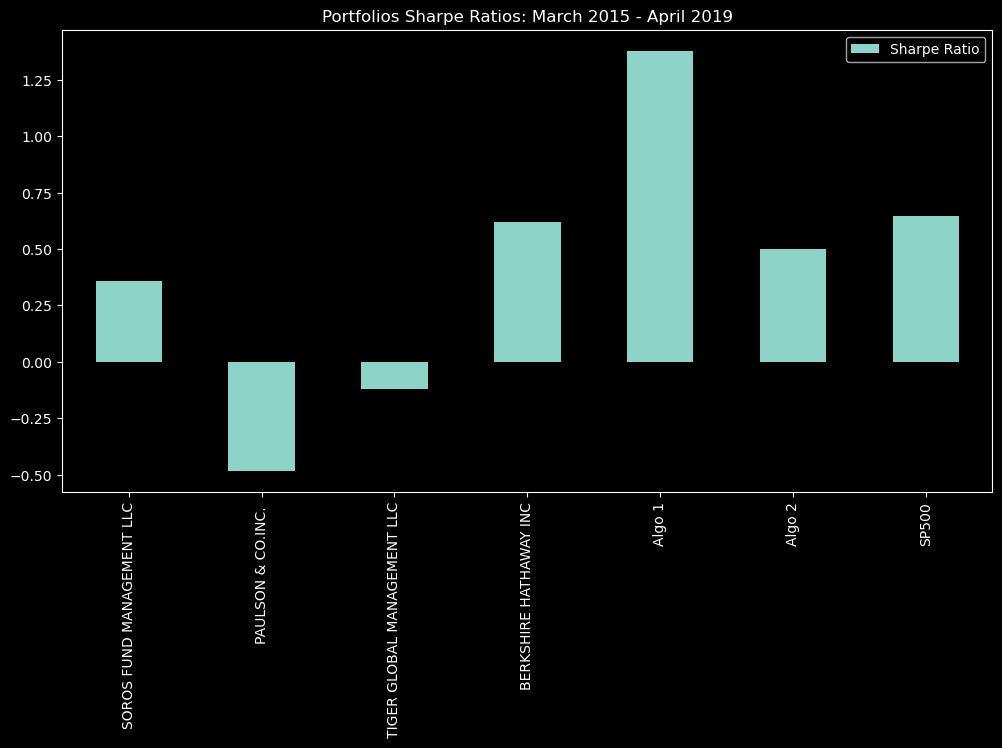

In [30]:
# Visualize the sharpe ratios as a bar plot
#returns_sharpe_ratio.plot(kind='bar', title='Portfolios Sharpe Ratios: March 2015 - April 2019', rot=90, figsize=(12,6))
returns_sharpe_ratio_df=pd.DataFrame(returns_sharpe_ratio, columns=(['Sharpe Ratio']))
print(returns_sharpe_ratio_df)
returns_sharpe_ratio_df.plot(kind='bar', title='Portfolios Sharpe Ratios: March 2015 - April 2019', rot=90, figsize=(12,6))
# Bars are monochromatic because Sharpe Ratio is listed in a single column as a single series, rather than in individual columns for each portfolio, or multiple series, which by default would plot with different color for each

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

1) Algo 1 outperforms all portfolios, including the S&P 500 index benchmark, as measured by the largest return-to-risk metric, or Sharpe Ratio, of 1.38
2) Algo 2, with a moderate Sharpe Ratio of 0.50, outperformed only Soros, Tiger, and Paulson portfolios, while it underperformed Algo 1, Berkshire, and the S&P 500, as measured by the Sharpe Ratio

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
# Custom stocks chosen [Name (Ticker Symbol)]: Exxon Mobil (XOM), Jefferies Financial Group (JEF), Microsoft (MSFT), Johnson & Johnson (JNJ), Tesla (TSLA)
# For the period Jan 1, 2017 - Dec 31, 2018
# Data c.f. https://finance.yahoo.com/quote.  Adjusted Close price used, as it reflects historical dividends, stock splits, and other adjustments.
file_nm = 'XOM.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
xom_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(xom_prices_close_df) #Inspect file read in
xom_price_close = xom_prices_close_df['Adj Close']
xom_price_close.name='XOM Adj Close'
#xom_price_close

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-12-30  90.029999  90.699997  90.010002  90.260002  65.774185   9117800
2017-01-03  90.940002  91.339996  90.150002  90.889999  66.233276  10360600
2017-01-04  91.120003  91.150002  89.750000  89.889999  65.504539   9434200
2017-01-05  90.190002  90.300003  88.440002  88.550003  64.528069  14443200
2017-01-06  88.790001  88.980003  87.820000  88.500000  64.491631  16518100
...               ...        ...        ...        ...        ...       ...
2018-12-21  68.139999  70.370003  67.669998  68.120003  53.665497  47287300
2018-12-24  66.870003  67.529999  65.440002  65.510002  51.609314  14262800
2018-12-26  66.180000  68.660004  64.650002  68.639999  54.075165  24887700
2018-12-27  67.739998  68.940002  66.080002  68.940002  54.311504  22077000
2018-12-28  69.180000  69.580002  67.820000  68.169998  53.704880  19710600

[502 rows x

In [33]:
# Reading data from 2nd stock
file_nm = 'JEF.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
jef_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(jef_prices_close_df) #Inspect file read in
jef_price_close = jef_prices_close_df['Adj Close']
jef_price_close.name='JEF Adj Close'
#jef_price_close

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2016-12-30  20.749638  20.830200  20.695927  20.812298  17.523033  1556383
2017-01-03  20.910765  21.036085  20.704880  20.857056  17.560719  2363731
2017-01-04  20.982376  21.233019  20.973425  21.170359  17.824507  1701386
2017-01-05  21.125601  21.179310  20.794394  20.991327  17.673773  1388814
2017-01-06  21.062941  21.161407  20.866007  21.062941  17.734066  1360662
...               ...        ...        ...        ...        ...      ...
2018-12-21  15.271303  15.602509  14.931145  15.029612  13.077601  5177777
2018-12-24  15.029612  15.056466  14.590987  14.671551  12.766044  1369264
2018-12-26  14.725260  15.530897  14.501472  15.530897  13.513781  2593524
2018-12-27  15.262351  15.665170  15.047515  15.602509  13.576089  3631448
2018-12-28  15.692025  15.853152  15.504043  15.593558  13.568303  2405288

[502 rows x 6 columns]


In [34]:
# Reading data from 3rd stock
file_nm = 'TSLA.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
tsla_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(tsla_prices_close_df) #Inspect file read in
tsla_price_close = tsla_prices_close_df['Adj Close']
tsla_price_close.name='TSLA Adj Close'
#tsla_price_close

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-12-30  14.420000  14.500000  14.112000  14.246000  14.246000   69639000
2017-01-03  14.324000  14.688667  14.064000  14.466000  14.466000   88849500
2017-01-04  14.316667  15.200000  14.287333  15.132667  15.132667  168202500
2017-01-05  15.094667  15.165333  14.796667  15.116667  15.116667   88675500
2017-01-06  15.128667  15.354000  15.030000  15.267333  15.267333   82918500
...               ...        ...        ...        ...        ...        ...
2018-12-21  21.160000  21.564667  20.829332  21.318001  21.318001  120252000
2018-12-24  20.900000  20.966667  19.680000  19.692667  19.692667   83398500
2018-12-26  20.000000  21.798000  19.606001  21.739332  21.739332  122446500
2018-12-27  21.322666  21.478001  20.100000  21.075333  21.075333  128626500
2018-12-28  21.540001  22.416000  21.227333  22.257999  22.257999  149085000

In [35]:
# Reading data from 4th stock
file_nm = 'JNJ.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
jnj_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(jnj_prices_close_df) #Inspect file read in
jnj_price_close = jnj_prices_close_df['Adj Close']
jnj_price_close.name='JNJ Adj Close'
#jnj_price_close

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-12-30  115.800003  115.989998  114.980003  115.209999   96.951797   
2017-01-03  115.779999  116.000000  115.230003  115.839996   97.481964   
2017-01-04  115.500000  116.230003  115.309998  115.650002   97.322083   
2017-01-05  116.000000  116.970001  115.440002  116.860001   98.340324   
2017-01-06  116.669998  117.000000  115.760002  116.300003   97.869057   
...                ...         ...         ...         ...         ...   
2018-12-21  127.800003  130.600006  127.120003  128.089996  113.590950   
2018-12-24  127.300003  128.000000  121.000000  122.839996  108.935219   
2018-12-26  123.419998  126.760002  122.010002  126.709999  112.367149   
2018-12-27  125.870003  127.410004  123.070000  127.410004  112.987938   
2018-12-28  127.910004  128.750000  126.750000  127.269997  112.863747   

              Volume  
Date          

In [36]:
# Reading data from 5th stock
file_nm = 'MSFT.csv'
path_file_nm = Path(f"Starter_Code/Resources/{file_nm}")
#path_file_nm = Path("Starter_Code/Resources/"+str(file_nm)) # Alternative string specification for the path_file_nm, not sure which is better
msft_prices_close_df = pd.read_csv(filepath_or_buffer=path_file_nm, index_col='Date', infer_datetime_format=True, parse_dates=True)
print(msft_prices_close_df) #Inspect file read in
msft_price_close = msft_prices_close_df['Adj Close']
msft_price_close.name='MSFT Adj Close'
#msft_price_close

                  Open        High        Low       Close  Adj Close  \
Date                                                                   
2016-12-30   62.959999   62.990002  62.029999   62.139999  56.972500   
2017-01-03   62.790001   62.840000  62.130001   62.580002  57.375916   
2017-01-04   62.480000   62.750000  62.119999   62.299999  57.119205   
2017-01-05   62.189999   62.660000  62.029999   62.299999  57.119205   
2017-01-06   62.299999   63.150002  62.040001   62.840000  57.614304   
...                ...         ...        ...         ...        ...   
2018-12-21  101.629997  103.000000  97.459999   98.230003  93.666153   
2018-12-24   97.680000   97.970001  93.980003   94.129997  89.756645   
2018-12-26   95.139999  100.690002  93.959999  100.559998  95.887886   
2018-12-27   99.300003  101.190002  96.400002  101.180000  96.479073   
2018-12-28  102.089996  102.410004  99.519997  100.389999  95.725807   

               Volume  
Date                   
2016-12-30   25

In [38]:
# Combine all stocks in a single DataFrame
stocks_price_close_df = pd.concat([xom_price_close, jef_price_close, tsla_price_close, jnj_price_close, msft_price_close], join='inner', axis='columns')
print(stocks_price_close_df.info())
stocks_price_close_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2016-12-30 to 2018-12-28
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   XOM Adj Close   502 non-null    float64
 1   JEF Adj Close   502 non-null    float64
 2   TSLA Adj Close  502 non-null    float64
 3   JNJ Adj Close   502 non-null    float64
 4   MSFT Adj Close  502 non-null    float64
dtypes: float64(5)
memory usage: 39.7 KB
None


,XOM Adj Close,JEF Adj Close,TSLA Adj Close,JNJ Adj Close,MSFT Adj Close
Date,,,,,
2016-12-30,65.774185,17.523033,14.246000,96.951797,56.972500
2017-01-03,66.233276,17.560719,14.466000,97.481964,57.375916
2017-01-04,65.504539,17.824507,15.132667,97.322083,57.119205
2017-01-05,64.528069,17.673773,15.116667,98.340324,57.119205
2017-01-06,64.491631,17.734066,15.267333,97.869057,57.614304
...,...,...,...,...,...
2018-12-21,53.665497,13.077601,21.318001,113.590950,93.666153
2018-12-24,51.609314,12.766044,19.692667,108.935219,89.756645
2018-12-26,54.075165,13.513781,21.739332,112.367149,95.887886


In [40]:
# Reset Date index
# This is confusing, and don't believe applicable here as performed inner join on columns, not rows as may have been assumed by this step.  However, explicit restatement of index as 'Date' in the event certain dates didn't join horizontally:
stocks_price_close_df = stocks_price_close_df.reset_index(drop=False)
print(stocks_price_close_df)
stocks_price_close_df = stocks_price_close_df.set_index(['Date'])
print(stocks_price_close_df)

          Date  XOM Adj Close  JEF Adj Close  TSLA Adj Close  JNJ Adj Close  \
0   2016-12-30      65.774185      17.523033       14.246000      96.951797   
1   2017-01-03      66.233276      17.560719       14.466000      97.481964   
2   2017-01-04      65.504539      17.824507       15.132667      97.322083   
3   2017-01-05      64.528069      17.673773       15.116667      98.340324   
4   2017-01-06      64.491631      17.734066       15.267333      97.869057   
..         ...            ...            ...             ...            ...   
497 2018-12-21      53.665497      13.077601       21.318001     113.590950   
498 2018-12-24      51.609314      12.766044       19.692667     108.935219   
499 2018-12-26      54.075165      13.513781       21.739332     112.367149   
500 2018-12-27      54.311504      13.576089       21.075333     112.987938   
501 2018-12-28      53.704880      13.568303       22.257999     112.863747   

     MSFT Adj Close  
0         56.972500  
1      

In [41]:
# Reorganize portfolio data by having a column per symbol
stocks_price_close_df = stocks_price_close_df.rename(columns={'XOM Adj Close':'XOM', 'JEF Adj Close':'JEF','TSLA Adj Close':'TSLA','JNJ Adj Close':'JNJ','MSFT Adj Close':'MSFT'}).copy()
stocks_price_close_df

,XOM,JEF,TSLA,JNJ,MSFT
Date,,,,,
2016-12-30,65.774185,17.523033,14.246000,96.951797,56.972500
2017-01-03,66.233276,17.560719,14.466000,97.481964,57.375916
2017-01-04,65.504539,17.824507,15.132667,97.322083,57.119205
2017-01-05,64.528069,17.673773,15.116667,98.340324,57.119205
2017-01-06,64.491631,17.734066,15.267333,97.869057,57.614304
...,...,...,...,...,...
2018-12-21,53.665497,13.077601,21.318001,113.590950,93.666153
2018-12-24,51.609314,12.766044,19.692667,108.935219,89.756645
2018-12-26,54.075165,13.513781,21.739332,112.367149,95.887886


In [49]:
# Calculate daily returns
stocks_returns_df = stocks_price_close_df.pct_change()
#print(stocks_returns_df)
# Drop NAs
#print(stocks_returns_df.isnull().value_counts())
print('NA counts before dropna():')
print(stocks_returns_df.isnull().sum())
print(f"\nstocks_returns_clean_df after dropna():")
stocks_returns_clean_df = stocks_returns_df.dropna().copy()
# Display sample data
stocks_returns_clean_df

NA counts before dropna():
XOM     1
JEF     1
TSLA    1
JNJ     1
MSFT    1
dtype: int64

stocks_returns_clean_df after dropna():


,XOM,JEF,TSLA,JNJ,MSFT
Date,,,,,
2017-01-03,0.006980,0.002151,0.015443,0.005468,0.007081
2017-01-04,-0.011003,0.015021,0.046085,-0.001640,-0.004474
2017-01-05,-0.014907,-0.008457,-0.001057,0.010463,0.000000
2017-01-06,-0.000565,0.003411,0.009967,-0.004792,0.008668
2017-01-09,-0.016497,-0.013175,0.009912,-0.000172,-0.003183
...,...,...,...,...,...
2018-12-21,-0.007431,-0.010023,0.013920,-0.001403,-0.032312
2018-12-24,-0.038315,-0.023824,-0.076242,-0.040987,-0.041739
2018-12-26,0.047779,0.058572,0.103930,0.031504,0.068310


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
# Calculate portfolio return
stocks_returns_clean_df['Portfolio'] = stocks_returns_clean_df.dot(weights) # The 'dot' function is a method of the pandas dataframe object
# Display sample data
stocks_and_portfolio_returns_df = stocks_returns_clean_df
#print(stocks_and_portfolio_returns_df)
custom_portfolio_returns_df = stocks_and_portfolio_returns_df.drop(columns=['XOM', 'JEF', 'TSLA', 'JNJ','MSFT'])
custom_portfolio_returns_df

,Portfolio
Date,
2017-01-03,0.007425
2017-01-04,0.008798
2017-01-05,-0.002792
2017-01-06,0.003338
2017-01-09,-0.004623
...,...
2018-12-21,-0.007450
2018-12-24,-0.044221
2018-12-26,0.062019


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# Join your returns DataFrame to the original returns DataFrame
#print(stocks_and_portfolio_returns_df)
#print(returns_df)
returns_portfolios_df = pd.concat([returns_df, custom_portfolio_returns_df], axis='columns', join='inner')
returns_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Portfolio
Date,,,,,,,,
2017-01-03,0.004301,0.015299,0.003969,0.008224,0.007381,0.009358,0.008487,0.007425
2017-01-04,0.011581,0.007029,-0.001011,0.012204,0.012510,0.014701,0.005722,0.008798
2017-01-05,0.003079,0.004107,-0.004264,0.016092,-0.003955,-0.001872,-0.000771,-0.002792
2017-01-06,0.003561,-0.013250,-0.001213,0.005667,-0.000364,0.000051,0.003517,0.003338
2017-01-09,-0.000458,0.002007,-0.004540,-0.002642,0.002775,-0.006277,-0.003549,-0.004623
...,...,...,...,...,...,...,...,...
2018-12-21,-0.022720,-0.020980,-0.022570,-0.028892,-0.017888,-0.021636,-0.020588,-0.007450
2018-12-24,-0.019152,-0.011786,-0.029165,-0.020181,-0.003938,-0.014745,-0.027112,-0.044221
2018-12-26,0.042977,0.029338,0.030958,0.059909,0.022750,0.030822,0.049594,0.062019


In [52]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
print('NA counts:')
print(returns_portfolios_df.isnull().sum()) # Since inner join was on columns, or axis=1, orphaned index dates automatically dropped upon concatenation

NA counts:
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500                          0
Portfolio                      0
dtype: int64


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [54]:
# Calculate the annualized `std`
# annualized_standard_deviation = annualized_variance^(1/2) = ((daily_standard_deviation^2)*252)^(1/2) = (daily_variance*252)^(1/2)
returns_portfolios_annualized_standard_deviation_df = (((returns_portfolios_df.std())**2)*252)**(1/2)
returns_portfolios_annualized_standard_deviation_df

SOROS FUND MANAGEMENT LLC      0.125072
PAULSON & CO.INC.              0.107138
TIGER GLOBAL MANAGEMENT LLC    0.168605
BERKSHIRE HATHAWAY INC         0.197134
Algo 1                         0.103037
Algo 2                         0.118835
SP500                          0.129582
Portfolio                      0.174852
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Whale and Custom Portfolios Rolling 21-Day Daily Standard Deviation'}, xlabel='Date'>

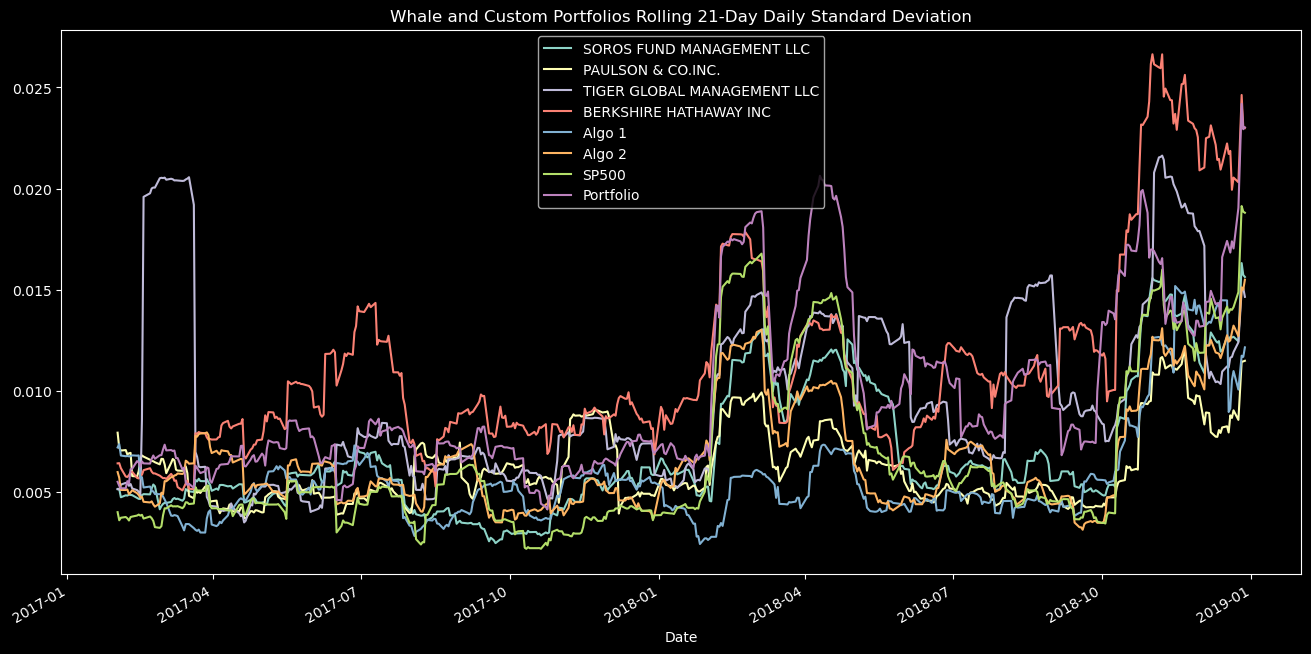

In [55]:
# Calculate rolling standard deviation
rolling_21_day_standard_deviation_portfolios_df = returns_portfolios_df.rolling(window=21).std().dropna().copy()
#print(rolling_21_day_standard_deviation_portfolios_df)
# Plot rolling standard deviation
rolling_21_day_standard_deviation_portfolios_df.plot(title='Whale and Custom Portfolios Rolling 21-Day Daily Standard Deviation', figsize=(16,8))

### Calculate and plot the correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.673582,0.537426,0.763200,0.303821,0.794355,0.813552,0.652359
PAULSON & CO.INC.,0.673582,1.000000,0.471193,0.557228,0.285987,0.711266,0.694733,0.550313
TIGER GLOBAL MANAGEMENT LLC,0.537426,0.471193,1.000000,0.412050,0.104133,0.506158,0.614498,0.508599
BERKSHIRE HATHAWAY INC,0.763200,0.557228,0.412050,1.000000,0.265538,0.733710,0.786144,0.637398
Algo 1,0.303821,0.285987,0.104133,0.265538,1.000000,0.300270,0.274720,0.222899
Algo 2,0.794355,0.711266,0.506158,0.733710,0.300270,1.000000,0.866310,0.688045
SP500,0.813552,0.694733,0.614498,0.786144,0.274720,0.866310,1.000000,0.809165
Portfolio,0.652359,0.550313,0.508599,0.637398,0.222899,0.688045,0.809165,1.000000


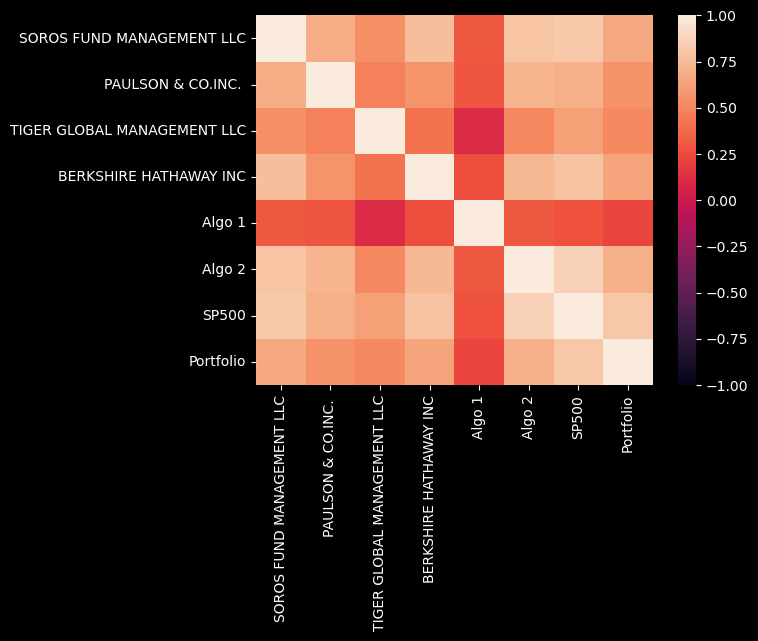

In [58]:
# Calculate and plot the correlation
returns_portfolios_correlation_df = returns_portfolios_df.corr()
#sns.heatmap(returns_portfolios_correlation_df, vmin=-1, vmax=1,center=0)
sns.heatmap(returns_portfolios_correlation_df, vmin=-1, vmax=1)
returns_portfolios_correlation_df

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

SOROS FUND MANAGEMENT LLC covariance with S&P 500 was: 5.2322662735385246e-05
PAULSON & CO.INC.  covariance with S&P 500 was: 3.827433583083964e-05
TIGER GLOBAL MANAGEMENT LLC covariance with S&P 500 was: 5.327631585746922e-05
BERKSHIRE HATHAWAY INC covariance with S&P 500 was: 7.96905727466789e-05
Algo 1 covariance with S&P 500 was: 1.4555482435593126e-05
Algo 2 covariance with S&P 500 was: 5.2937311127334574e-05
SP500 covariance with S&P 500 was: 6.663292572124358e-05
Portfolio covariance with S&P 500 was: 7.275315314211258e-05

The variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = 6.663292572124358e-05
True 

Whale and Custom Portfolios Betas Table:


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Portfolio
0,0.785237,0.574406,0.799549,1.195964,0.218443,0.794462,1.0,1.09185


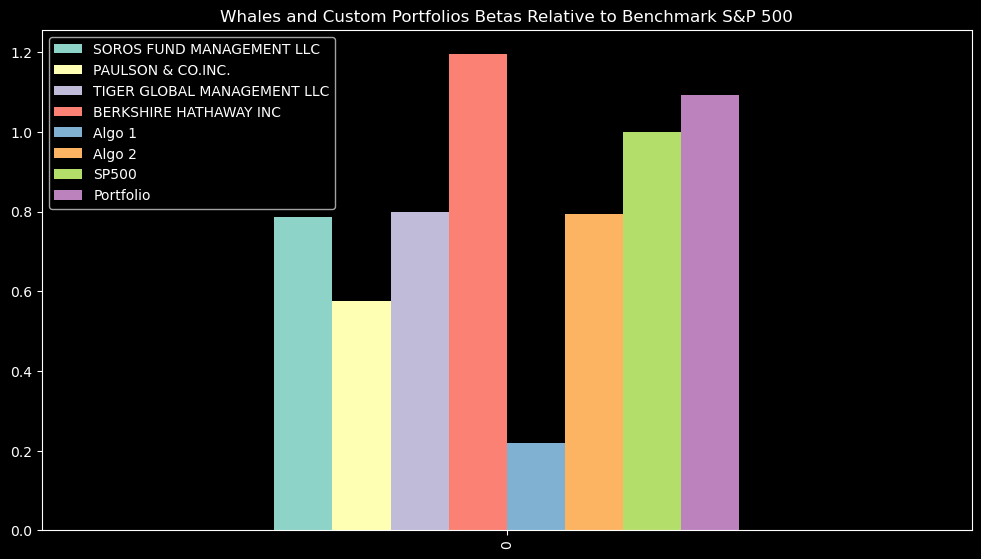

In [66]:
# Calculating beta
# Calculate covariance of a single portfolio.  We need to recalculate covariance and other stats since our custom portfolio time frame is different from the original whale portfolios.
cov_ports={} 
for each in returns_portfolios_df:
    cov_ports[each] = returns_portfolios_df[each].cov(returns_portfolios_df['SP500'])
    print(f"{each} covariance with S&P 500 was: {cov_ports[each]}")    
    # Could prettify by putting covariance dictionary into dataframe
#print(cov)

# Calculate variance of S&P 500
print(f"\nThe variance of the S&P 500 is the same as the covariance of the S&P 500 with itself = {cov_ports['SP500']}")
# Confirm S&P 500 variance via the traditional calculation is equivalent to calculation above of S&P 500 covariance with itself
sp500_var_new = cov_ports['SP500']
print(returns_portfolios_df.SP500.var()==cov_ports['SP500'],"\n") # Returns 'True', perfect.

# Computing beta
# Beta = cov(x,m)/v(m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
beta_ports={}
for each in cov_ports:
    beta_ports[each] = cov_ports[each]/sp500_var_new
#print(beta_ports)

# Plot beta
# Prettify by putting beta dictionary into dataframe
beta_ports_df = pd.DataFrame([beta_ports]) # Explicity wrapped the dictionary in a list, 1 of 3 methods to otherwise circumvent conversion to dataframe error raised 'ValueError: If using all scalar values, you must pass an index' (see https://www.statology.org/valueerror-if-using-all-scalar-values-you-must-pass-an-index/)
#print("\n",beta_ports_df)
beta_ports_df.plot(kind='bar', figsize=(12,6.5), title='Whales and Custom Portfolios Betas Relative to Benchmark S&P 500')
print('Whale and Custom Portfolios Betas Dataframe:')
beta_ports_df
# Plot beta trend (see next Notebook cell below)

In [ ]:
# Plot 60-day beta trend
rolling_60_day_cov={} # Using nifty dictionary
for each in returns_portfolios_df:
    rolling_60_day_cov[each] = returns_portfolios_df[each].rolling(window=60).cov(returns_portfolios_df['SP500'])
    #print(f"{each} rolling 60-day covariance with S&P 500 was: {rolling_60_day_cov[each]}") # Nifty dictionary key-value lookup. 
    # Could prettify by putting covariance dictionary into dataframe
#print(rolling_60_day_cov)
rolling_60_day_cov_clean_df = pd.DataFrame(rolling_60_day_cov).dropna().copy() # Since not passing all scalar values, did not have to pass an index by forcing one through wrapping dictionary in list within pd.DataFrame function.
rolling_60_day_cov_clean_df

# Calculate variance of S&P 500
#print(f"\nThe rolling 60-day variance of the S&P 500 is the same as the rolling 60-day covariance of the S&P 500 with itself = {rolling_60_day_cov['SP500']}")
#sp500_rolling_60_day_var = rolling_60_day_cov['SP500']

# # Computing beta # Lesson here versus previous Notebook cell above is to get dictionary into dataframe as soon as possible, obviates need for messing with another dictionary in the beta routine below.
# # Beta = cov(x,m)/v(m).  Note too, beta is in fact related to correlation, and is proportional to correlation: Beta(x,m) = correlation(x,m) * stdev(x) / stdev(m)
# for each in rolling_60_day_cov_clean_df:
#     rolling_60_day_cov_clean_df[f"{each}_beta"] = rolling_60_day_cov[each]/rolling_60_day_cov['SP500']
# #print(rolling_60_day_cov_clean_df)
# print(rolling_60_day_cov_clean_df)

# Plot beta
# Columns to plot
#print(rolling_60_day_cov_clean_df.columns)
#rolling_60_day_cov_clean_df[['SOROS FUND MANAGEMENT LLC_beta',
#       'PAULSON & CO.INC. _beta', 'TIGER GLOBAL MANAGEMENT LLC_beta',
#       'BERKSHIRE HATHAWAY INC_beta', 'Algo 1_beta', 'Algo 2_beta','SP500_beta', 'Portfolio_beta']].plot(kind='line', figsize=(12,6), title='Whales and Custom Portfolios Rolling 60-Day Betas Relative to Benchmark S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
# Annualized Sharpe Ratio = (Annualized Portfolio Return - Annualized Risk-Free Rate of Return) / Annualized Portfolio Standard Deviation - Annualized Risk-Free Standard Deviation
# We will assume the risk-free (typically 10-yr Treasury bond) rate of return and risk are zero.  Therefore, simplified Annualized Sharpe Ratio = Annualized Portfolio Return / Annualized Portfolio Standard Deviation
#print(returns_portfolios_df.mean()*252)
#print(returns_portfolios_annualized_standard_deviation_df)
returns_portfolios_sharpe_ratio = returns_portfolios_df.mean()*252 / (returns_portfolios_annualized_standard_deviation_df) # annualized_standard_deviation = annualized_variance^(1/2) = ((daily_standard_deviation^2)*252)^(1/2)
#returns_portfolios_sharpe_ratio # Returns a dictionary
print(returns_portfolios_sharpe_ratio)
print(f"\nOur custom portfolio had a Sharpe Ratio of {returns_portfolios_sharpe_ratio['Portfolio']} for the period Jan 1, 2017 - Dec 31, 2018, exceeding all whale portfolios except \
Berkshire Hathaway ({returns_portfolios_sharpe_ratio['BERKSHIRE HATHAWAY INC']}) and Algo 1 ({returns_portfolios_sharpe_ratio['Algo 1']}).")

In [ ]:
# Visualize the sharpe ratios as a bar plot
returns_portfolios_sharpe_ratio_df=pd.DataFrame(returns_portfolios_sharpe_ratio, columns=(['Annualized Sharpe Ratio']))
print(returns_portfolios_sharpe_ratio_df)
returns_portfolios_sharpe_ratio_df.plot(kind='bar', title='Whales and Custom Portfolios Sharpe Ratios: Jan 1, 2017 - Dec 31, 2018', rot=90, figsize=(12,6))
# Bars are monochromatic because Sharpe Ratio is listed in a single column as a single series, rather than in individual columns for each portfolio, or multiple series, which by default would plot each bar with a different color

### How does your portfolio do?

Write your answer here!

In [ ]:
print(f"\nOur custom portfolio had a Sharpe Ratio of {returns_portfolios_sharpe_ratio['Portfolio']} for the period Jan 1, 2017 - Dec 31, 2018, indicating a more favorable risk-return profile, or reward for the risk taken, \
than all whale portfolios, except Berkshire Hathaway ({returns_portfolios_sharpe_ratio['BERKSHIRE HATHAWAY INC']}) and Algo 1 ({returns_portfolios_sharpe_ratio['Algo 1']}).")